In [2]:
import numpy as np
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt

In [3]:
def sigmoid(s):
    return 1 / (1 + np.exp(-s))

# Generating Dataset

Parameters
* theta : The  probability of flipping the label, Y
* n : the size of the data set
* m : the number of independent variables

Returns

* Beta: Randomly generated weight/parameter vector of shape (m+1, 1)
*  X: Randomly generated independent data of shape (n, m+1)
* Y: Calculated dependent variable using Beta and X according to the following formula:
        Y = sigmoid(Beta * X) 
Here theta is the noise that will be added to generated labels by flipping their true lables


In [4]:
def generate_dataset(theta,m,n):
    X = np.random.randn(n,m+1)
    X[:,0] = 1
    beta = np.random.rand(m+1,1)
    Y = sigmoid(np.matmul(X,beta)) > 0.5
    Y = Y.astype('float')
    indices = np.random.choice(range(len(Y)),int(theta*len(Y)),replace=False)
    Y[indices] = Y[indices] == 0.
    return X,Y,beta

# Logistic Regression Implementation 

### Logistic Loss
Logistic loss(cross entropy) cost function. Used to guide gradient descent in appropriate direction and converge

### Gradient Descent
Derivative of logistic loss cost function. Gradient is used to update the parameter values


In [5]:
def logistic_loss(Y,Y_hat):
    n = Y.shape[0]
    cost = -np.sum(Y*np.log(Y_hat) + (1-Y)*np.log(1-Y_hat))/n
    return cost

def gradient_descent(Y,Y_hat,X):
    n = Y.shape[0]
    grad = np.matmul(X.T,(Y_hat-Y))/n
    return grad

In [6]:
def logistic_regression(X,Y,lr,epochs,threshold):
    m = X.shape[1]
    beta = np.random.rand(m,1)*0.01
    prev_cost = float('inf')
    costs = []
    for i in range(epochs):
        Y_hat = sigmoid(np.matmul(X,beta))
        curr_cost = logistic_loss(Y,Y_hat)
        costs.append(curr_cost)
        if abs(prev_cost - curr_cost) <= threshold:
            break
        prev_cost = curr_cost
        dbeta = gradient_descent(Y,Y_hat,X)
        beta = beta - lr*dbeta
    return curr_cost,beta,costs

In [7]:
X,Y,beta = generate_dataset(0.,60,1000)
simple_cost,simple_beta,simple_costs = logistic_regression(X,Y,0.01,50000,0.00001)

# cost vs epochs

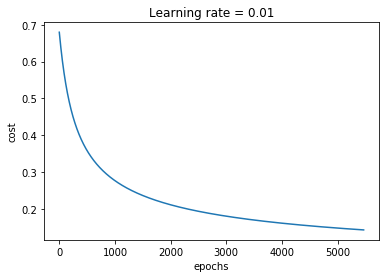

In [8]:
plt.plot(simple_costs)
plt.ylabel('cost')
plt.xlabel('epochs')
plt.title("Learning rate = "+str(0.01))
plt.show()

# Cosine Similarity

It is the measure of how similar the learnt parameters and actual parameters are.

A value closer to 1 indicates two vectors are more similar

In [9]:
def cosine_similarity(actual, learnt):
    abs_actual = np.linalg.norm(actual)
    abs_learnt = np.linalg.norm(learnt)
    cos = np.matmul(actual.T, learnt) / (abs_actual * abs_learnt)
    return cos.squeeze()

Variation of learning with the noise in the generated labels 

We check how the learning is affected if noise in the generated labels is increased or decreased.

We check for theta values: [0.1,0.25,0.4,0.55,0.6,0.75,0.85]

In [10]:
thetas = [0.1,0.25,0.4,0.55,0.6,0.75,0.85]
lr = 0.01
threshold = 0.00001
epochs = 10000
similarity_list = []
theta_costs = []
for theta in thetas: 
    X_,Y_,actual_beta = generate_dataset(theta,100,10000)
    cost,learnt_beta,_ = logistic_regression(X_,Y_,lr,epochs,threshold)
    theta_costs.append(cost)
    similarity_list.append(cosine_similarity(actual_beta,learnt_beta))

# Plotting variation with theta(noise in output labels)

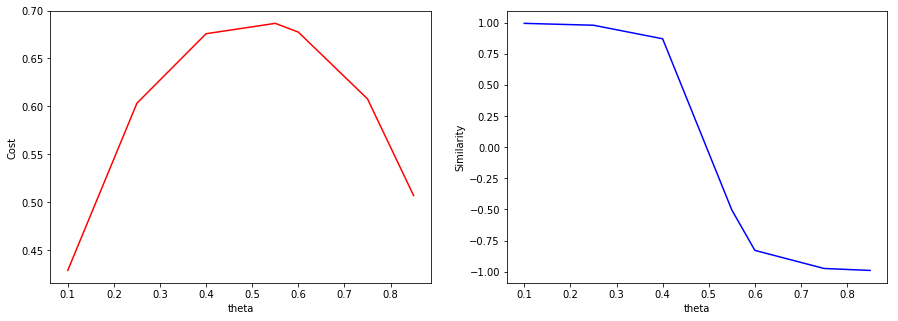

In [11]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(thetas, theta_costs, 'r')
ax1.set(xlabel='theta', ylabel='Cost')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(thetas, similarity_list, 'b')
ax2.set(xlabel='theta', ylabel='Similarity')

plt.show()

# Conclusion

> We can see as the noise increases, the cost value starts increasing up unitl it reaches 0.5, after that if theta is increased more then the model starts learning the noise and hence the cost value starts decreasing.

In [12]:
lr = 0.01
threshold = 0.00001
epochs = 10000
similarity_list = []
dataset_size = [1500,3000,5000,7500,10000]
dataset_costs = []
for n in dataset_size: 
    X_,Y_,actual_beta = generate_dataset(0.02,70,n)
    cost,learnt_beta,_ = logistic_regression(X_,Y_,lr,epochs,threshold)
    dataset_costs.append(cost)
    similarity_list.append(cosine_similarity(actual_beta,learnt_beta))

# Plotting variation with data set size

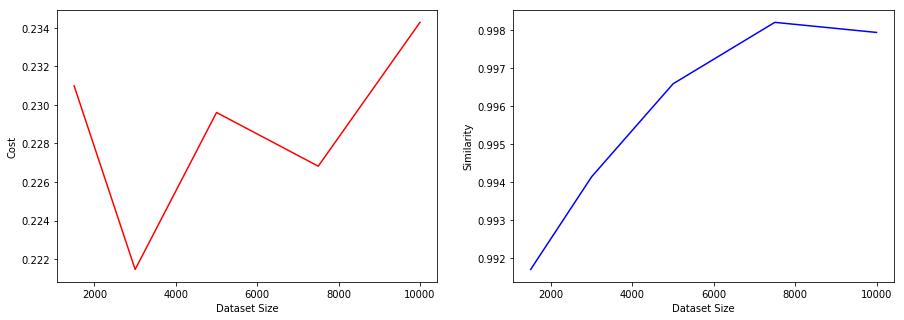

In [13]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(dataset_size, dataset_costs, 'r')
ax1.set(xlabel='Dataset Size', ylabel='Cost')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(dataset_size, similarity_list, 'b')
ax2.set(xlabel='Dataset Size', ylabel='Similarity')

plt.show()

### Derivation of the partial derivative of the cost function with respect to the parameters of the model.

Cost function = -y log(y_hat) – (1 – y) log(1 – y_hat)

Where y_hat = 1/(1 + exp(-z)),  z = ∑ ßx

Now, using chain rule of calculus
	
    d(Cost)/dß = d(Cost)/dy_hat  * dy_hat/dz * dz/dß …(i)
                            
d(Cost)/dy_hat  = -y/y_hat + (1-y)/(1-y_hat)

dy_hat/dz = y_hat(1-y_hat)

dz/dß = x

Substituting above values in eq. i)

d(Cost)/dß =(y_hat – y) x









### Logistic regression with regularization

In [14]:
def logistic_loss_with_regularization(Y,Y_hat,lambd,beta,regularization):
    n = Y.shape[0]
    cost = -np.sum(Y*np.log(Y_hat) + (1-Y)*np.log(1-Y_hat))/n 
    if regularization == "L1":
        regCost = cost + (lambd * np.linalg.norm(beta,1))/n
    elif regularization == "L2":
        regCost = cost + (lambd * (np.linalg.norm(beta,2))**2)/(2*n)
    return regCost

def gradient_descent_with_regularization(Y,Y_hat,X,beta,lambd,regularization):
    n = Y.shape[0]
    if regularization == "L1":
        grad0 = np.array(np.sum(Y_hat-Y)/n).reshape(1,1)
        lamda = lambd * abs(beta)/beta
        grad_rest = (np.matmul(X.T[1:],(Y_hat-Y)) + lamda)/n
        grad = np.concatenate((grad0,grad_rest),axis=0)
    elif regularization == "L2":
        grad0 = np.array(np.sum(Y_hat-Y)/n).reshape(1,1)
        grad_rest = (np.matmul(X.T[1:],(Y_hat-Y)) + (lambd * beta))/n
        grad = np.concatenate((grad0,grad_rest),axis=0)
    return grad

In [15]:
def logistic_regression_with_regularization(X,Y,lr,epochs,threshold,lambd,regularization):
    m = X.shape[1]
    beta = np.random.rand(m,1)
    prev_cost = float('inf')
    costs = []
    for i in range(epochs):
        Y_hat = sigmoid(np.matmul(X,beta))
        curr_cost = logistic_loss_with_regularization(Y,Y_hat,lambd,beta[1:],regularization)
        costs.append(curr_cost)
        if abs(prev_cost - curr_cost) <= threshold:
            break
        prev_cost = curr_cost
        dbeta = gradient_descent_with_regularization(Y,Y_hat,X,beta[1:],lambd,regularization)
        beta = beta - lr*dbeta
    return curr_cost,beta,costs

In [16]:
cost_L1,beta_with_L1,costs_L1 = logistic_regression_with_regularization(X,Y,0.01,10000,0.00001,20,"L1")

In [17]:
cost_L2,beta_with_L2,costs_L2 = logistic_regression_with_regularization(X,Y,0.01,10000,0.00001,20,"L2")

### Impact of Regularization on Model learnt

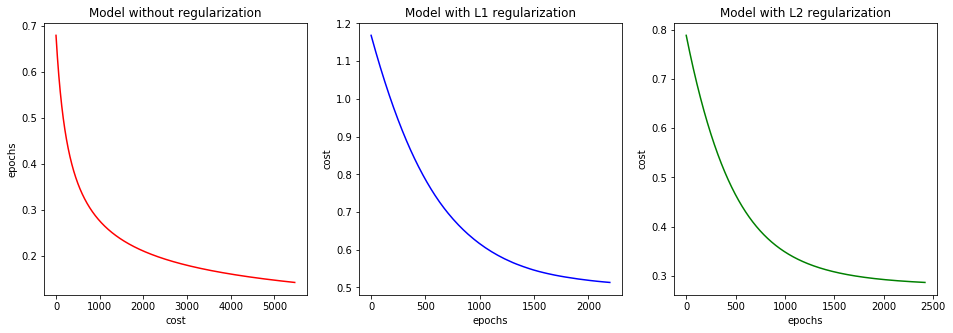

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].plot(range(len(simple_costs)), simple_costs, 'r')
axes[0].set_xlabel('cost')
axes[0].set_ylabel('epochs')
axes[0].set_title('Model without regularization')

axes[1].plot(range(len(costs_L1)), costs_L1, 'b')
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('cost')
axes[1].set_title('Model with L1 regularization')

axes[2].plot(range(len(costs_L2)), costs_L2, 'g')
axes[2].set_xlabel('epochs')
axes[2].set_ylabel('cost')
axes[2].set_title('Model with L2 regularization')

plt.show()

### Conclusion
The cost of the models with regularization is higher than the cost of models without regularization. It means that the models with regularization are not overfiiting the training data and hence more generalizable.

### Impact of variation of regularization constant on ß vector learnt

In [19]:
reg_constant = [1,5,10,15,20,25]
similarity_list = []
cost_list = []
for i in reg_constant:
    c,beta_learnt,_ = logistic_regression_with_regularization(X,Y,0.01,10000,0.00001,i,"L1")
    cost_list.append(c)
    similarity_list.append(cosine_similarity(beta,beta_learnt))

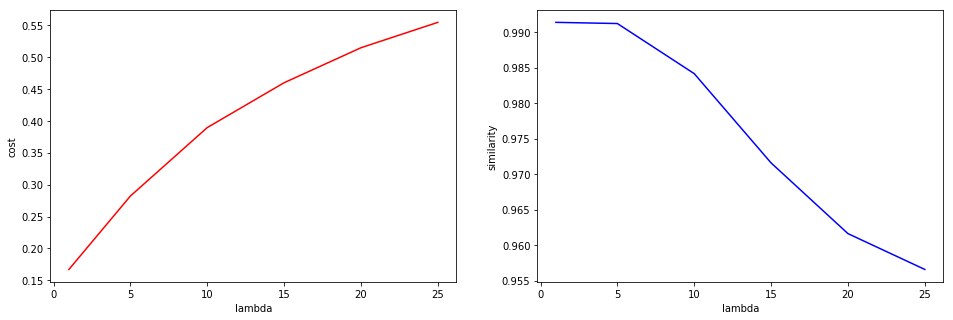

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(reg_constant, cost_list, 'r')
axes[0].set_xlabel('lambda')
axes[0].set_ylabel('cost')

axes[1].plot(reg_constant, similarity_list, 'b')
axes[1].set_xlabel('lambda')
axes[1].set_ylabel('similarity')

plt.show()

### Conclusion
 
As the value of regularization constant increases,the cost value increases and the similarity between the actual and learnt beta decreases. It means the complexity of the model decreases and hence the variance of the model decreases

### Merging the Linear Regression Code using OOPS concepts

In [21]:
class cost_calculation(ABC):
    @abstractmethod
    def cost(self):
        pass
    
class MSE_cost(cost_calculation):
    def __init__(self, Y, Y_hat, X):
        self.Y = Y
        self.X = X
        self.Y_hat = Y_hat
        self.n = Y.shape[0]
    def cost(self):
        cost = np.matmul((self.Y_hat - self.Y).T, self.Y_hat - self.Y) / (2*self.n)
        dbeta = np.matmul(self.X.T, (self.Y_hat - self.Y)) / self.n
        return np.squeeze(cost), dbeta
    
class CrossEntropy_cost(cost_calculation):
    def __init__(self, Y, Y_hat, X):
        self.Y = Y
        self.X = X
        self.Y_hat = Y_hat
        self.n = Y.shape[0]
        
    def cost(self):
        cost = -np.sum(self.Y * np.log(self.Y_hat) + (1-self.Y) * np.log(1 - self.Y_hat)) / self.n
        dbeta = np.matmul(self.X.T, (self.Y_hat - self.Y)) / self.n
        return cost, dbeta

In [22]:
class modelOptimizer(ABC):
    @abstractmethod
    def gradient(self):
        pass
    
class gradient_descent(modelOptimizer): 
    def __init__(self, beta, lr, dbeta):
        self.beta = beta
        self.dbeta = dbeta
        self.lr = lr
        
    def gradient(self):
        self.beta = self.beta - (self.lr * self.dbeta)
        return self.beta

In [23]:
class Algorithm(ABC):
    @abstractmethod
    def fit(self):
        pass
    
class LinearRegression(Algorithm):
    def __init__(self,X,Y,threshold,epochs,lr,optimizer):
        self.X = X
        self.Y = Y
        self.threshold = threshold
        self.epochs = epochs
        self.lr = lr
        self.optimizer = optimizer
    
    def fit(self):
        prev_cost = float('inf')
        beta = np.random.rand(self.X.shape[1],1)
        for i in range(self.epochs):
            Y_hat = np.matmul(self.X,beta)
            obj1 = MSE_cost(self.Y,Y_hat,self.X)
            cost, dbeta = obj1.cost()
            if self.optimizer == "gradient_descent":
                obj2 = gradient_descent(beta,self.lr,dbeta)
            beta = obj2.gradient()
            if abs(prev_cost - cost) <= self.threshold:
                break
            prev_cost = cost
        return cost, beta
        
        
class LogisticRegression(Algorithm):
    def __init__(self,X,Y,threshold,epochs,lr,optimizer):
        self.X = X
        self.Y = Y
        self.threshold = threshold
        self.epochs = epochs
        self.lr = lr
        self.optimizer = optimizer
        
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))

    def fit(self):
        prev_cost = float('inf')
        beta = np.random.rand(self.X.shape[1],1)
        for i in range(self.epochs):
            Y_hat = sigmoid(np.matmul(self.X,beta))
            obj1 = CrossEntropy_cost(self.Y,Y_hat,self.X)
            cost, dbeta = obj1.cost()
            if self.optimizer == "gradient_descent":
                obj2 = gradient_descent(beta,self.lr,dbeta)
            beta = obj2.gradient()
            if abs(prev_cost - cost) <= self.threshold:
                break
            prev_cost = cost
        return cost, beta
        